In [1]:
1 + 1

2

In [2]:
import pylab as plt

import sys

sys.path.append(
    "/data/id01/inhouse/bellec/software/sharedipynb/gitlab/bcdi_eb/"
)
from Reconstruction import *
from Plot_utilities import *
from Global_utilities import *

# Load preprocessed data

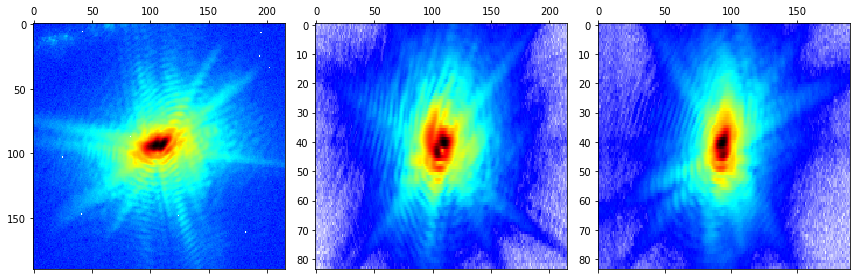

In [3]:
preprocessed_datapath = (
    "preprocessed_data_Pd_4_5e16/dataset_Pd_4_5e16_BCDI_x3_scan_5.npz"
)

data, mask, file_dict = load_diffraction_data_Q_space(
    preprocessed_datapath, plot=True
)

# Test one reconstruction

In [4]:
# import warnings
# def CDI_one_reconstruction(data, params,
#                            plot_result=True):
#     '''
#     :support_init: 'gauss_conv' or 'autocorrelation'. gauss_conv only works if the obj_init_list is given
#     :obj_init: careful, should not be fftshifted
#     '''

#     if np.any(np.array(data.shape) %2 != 0):
#         params['center_data'] = False
#         warnings.warn("Centering removed. Centering is dangerous with odd array dimension. put_back_centering_ramp function might need changes.", UserWarning)

#     if params['center_data']:
#         data, centering_offsets = center_the_center_of_mass(data, return_offsets=True)
#         print('centering_offsets : ', centering_offsets)

#     if params['support_init']=='gauss_conv' and params['obj_init'] is not None:
#         print('using gaussian convoluted and threshold as support')
#         support = EB_custom_support_from_object(obj_init, plot=True)
#     else :
#         support = None # Autocorrelation support will be used

#     if params['obj_init'] is None:
#         obj_init = CreateRandomInitialObject(data.shape)
#         support_init = 'autocorrelation'
#     else:
#         obj_init = np.copy(parms['obj_init'])
#     obj_init = fftshift(obj_init)

#     if support is not None:
#         support = fftshift(support)
#     if params['mask'] is not None:
#         mask = fftshift(params['mask'])

#     if params['cdi'] is None:
#         cdi = CDI(fftshift(data), obj=obj_init, support=support, mask=mask)
#     else:
#         cdi = params['cdi']
#         cdi.set_obj(params['obj_init'])
#         cdi.set_support(support)

#     cdi = ScaleObj() * cdi
# #     cdi = InitPSF()*cdi
#     cdi = InitPSF(fwhm=.5, eta=0.05)*cdi # Used to take partial coherence into account

#     if support_init=='autocorrelation':
#         print('using autocorrelation as support')
#         cdi = AutoCorrelationSupport(threshold=0.1) * cdi

#     if params['compute_free_llk']:
#         cdi.init_free_pixels() # Used to compute the free log likehood. In the end it doesn't work very well

#     support_threshold_relative = params['support_threshold_relative_min'] \
#                                 + np.random.rand()\
#                                 *(params['support_threshold_relative_max']-params['support_threshold_relative_min'])
# #     sup = SupportUpdate(threshold_relative=support_threshold_relative, smooth_width=params['support_smooth_width'],
# #                 force_shrink=False,method='max', post_expand=None)
#     sup = SupportUpdate(threshold_relative=support_threshold_relative, smooth_width=params['support_smooth_width'],
#                 force_shrink=False, post_expand=params['post_expand'])


#     plt.figure()

#     # Reconstruction algortihm
#     for algo in params['algo_string'].split():
#         method = algo.split('_')[0]
#         iterations = int(algo.split('_')[1])

#         if method == 'HIO':
#             cdi = (sup * HIO(beta=0.9, calc_llk=100, show_cdi=params['show_cdi'], update_psf=params['update_psf'])**params['support_update'])**(iterations//params['support_update'])* cdi
#         if method == 'RAAR' :
#             cdi = (sup * RAAR(beta=0.9, calc_llk=100, show_cdi=params['show_cdi'], update_psf=params['update_psf'])**params['support_update'])**(iterations//params['support_update'])* cdi
#         if method == 'ER' :
#             cdi = (sup * ER(calc_llk=20, show_cdi=params['show_cdi'], update_psf=params['update_psf']) ** params['support_update'])**(iterations//params['support_update']) *cdi

# #    # Reconstruction algortihm
# #     support_update = 20
# #     update_psf = 20
# #     cdi = (sup * HIO(beta=0.9, calc_llk=100, show_cdi=show_cdi, update_psf=update_psf)**support_update)**(400//support_update)* cdi
# #     cdi = (sup * RAAR(beta=0.9, calc_llk=100, show_cdi=show_cdi, update_psf=update_psf)**support_update)**(1000//support_update)* cdi
# #     cdi = (sup * ER(calc_llk=20, show_cdi=show_cdi, update_psf=update_psf) ** support_update)**(300//support_update) *cdi

#     if params['compute_free_llk']:
#         llk = cdi.get_llk()[3]
#     else:
#         llk = cdi.get_llk()[0]

#     obj = fftshift(cdi.get_obj())
#     support = fftshift(cdi.get_support())
#     obj, support = center_object(obj, support=support)

#     if params['center_data']:
#         obj = put_back_centering_ramp(obj, centering_offsets)

#     if params['plot_result']:
#         plot_2D_slices_middle_and_histogram(obj, support=support)

#     if params['return_cdi']:
#         return obj, llk, support, cdi
#     else:
#         return obj, llk, support

In [5]:
params = (
    default_cdi_parameters()
)  # parameters by default. Otherwise change it using the cell below

In [6]:
# params = {}
# params['center_data'] = True # center data during reconstruction
# params['show_cdi'] = 300
# # params['algo_string'] = 'HIO_600 RAAR_1000 ER_200 HIO_500'
# params['algo_string'] = 'HIO_400 RAAR_1000 ER_300'
# params['support_update'] = 20
# params['update_psf'] = 20

# params['obj_init'] = None
# params['support_init'] = 'gauss_conv'
# params['mask'] = mask
# params['cdi'] = None

# params['support_threshold_relative_min'] = .23
# params['support_threshold_relative_max'] = .3
# params['support_smooth_width'] = (2,1,600)
# params['post_expand'] = (1,-2,1)

# params['plot_result'] = True
# params['return_cdi'] = False

# params['compute_free_llk'] = True

centering_offsets :  [1, 1, 1]
Using autocorrelation as an initial support. If you're not happy, give either a support or an obj_init
using autocorrelation as support
 HIO #  0 LLK= 369.488[free=400.598](p), nb photons=6.429781e+02, support:nb= 13939 ( 0.404%) <obj>=      0.21 max=   1073.01, out=12.922% dt/cycle=0.2143s [PSF]


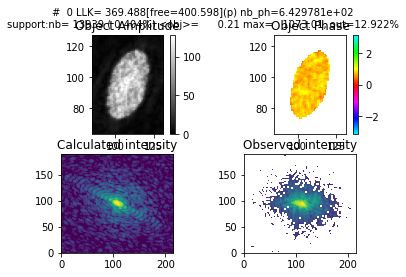

 HIO #100 LLK=   7.032[free= 11.236](p), nb photons=1.449948e+08, support:nb= 82242 ( 2.386%) <obj>=     41.99 max=   1583.90, out=0.065% dt/cycle=0.0095s [PSF]
 HIO #200 LLK=   5.711[free=  8.650](p), nb photons=1.367570e+08, support:nb= 93560 ( 2.714%) <obj>=     38.23 max=   1595.24, out=0.032% dt/cycle=0.0019s [PSF]
 HIO #300 LLK=   5.042[free=  6.421](p), nb photons=1.310755e+08, support:nb= 98451 ( 2.856%) <obj>=     36.49 max=   1574.06, out=0.027% dt/cycle=0.0019s [PSF]


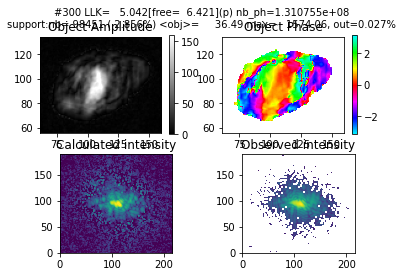

RAAR #400 LLK=   4.854[free=  5.044](p), nb photons=1.282559e+08, support:nb=100422 ( 2.913%) <obj>=     35.74 max=   1555.10, out=0.038% dt/cycle=0.0096s [PSF]
RAAR #500 LLK=   2.984[free=  4.154](p), nb photons=1.164268e+08, support:nb= 82558 ( 2.395%) <obj>=     37.55 max=   1516.71, out=0.800% dt/cycle=0.0019s [PSF]
RAAR #600 LLK=   4.257[free=  5.528](p), nb photons=1.157506e+08, support:nb= 73252 ( 2.125%) <obj>=     39.75 max=   1476.56, out=2.751% dt/cycle=0.0019s [PSF]


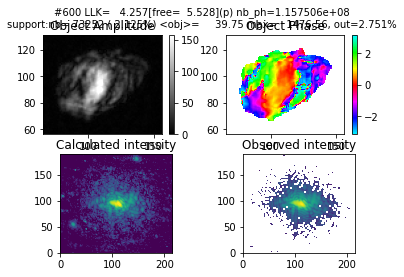

RAAR #700 LLK=   9.036[free= 10.250](p), nb photons=1.182974e+08, support:nb= 65887 ( 1.911%) <obj>=     42.37 max=   1415.76, out=2.343% dt/cycle=0.0093s [PSF]
RAAR #800 LLK=   7.230[free=  8.639](p), nb photons=1.156723e+08, support:nb= 58780 ( 1.705%) <obj>=     44.36 max=   1408.37, out=1.940% dt/cycle=0.0019s [PSF]
RAAR #900 LLK=   6.463[free=  7.674](p), nb photons=1.166611e+08, support:nb= 54167 ( 1.571%) <obj>=     46.41 max=   1396.31, out=1.611% dt/cycle=0.0019s [PSF]


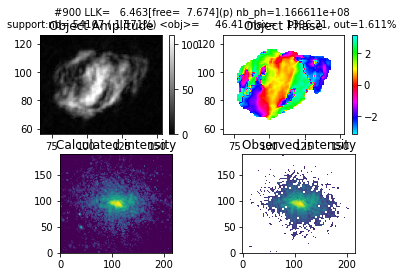

RAAR #1000 LLK=   6.693[free=  8.168](p), nb photons=1.158875e+08, support:nb= 51968 ( 1.507%) <obj>=     47.22 max=   1385.63, out=1.572% dt/cycle=0.0100s [PSF]
RAAR #1100 LLK=   7.752[free=  8.905](p), nb photons=1.157151e+08, support:nb= 50855 ( 1.475%) <obj>=     47.70 max=   1376.37, out=1.820% dt/cycle=0.0019s [PSF]
RAAR #1200 LLK=   8.269[free=  9.327](p), nb photons=1.169028e+08, support:nb= 50331 ( 1.460%) <obj>=     48.19 max=   1373.43, out=2.004% dt/cycle=0.0019s [PSF]


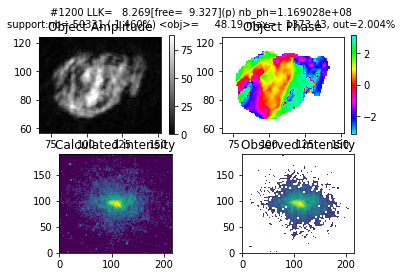

RAAR #1300 LLK=   9.544[free=  9.502](p), nb photons=1.201432e+08, support:nb= 50017 ( 1.451%) <obj>=     49.01 max=   1370.88, out=2.749% dt/cycle=0.0096s [PSF]
  ER #1400 LLK=   8.449[free=  8.940](p), nb photons=1.180954e+08, support:nb= 49774 ( 1.444%) <obj>=     48.71 max=   1370.67, out=2.688% dt/cycle=0.0019s [PSF]
  ER #1500 LLK=   4.440[free=  6.294](p), nb photons=1.130609e+08, support:nb= 48647 ( 1.411%) <obj>=     48.21 max=   1388.58, out=2.441% dt/cycle=0.0018s [PSF]


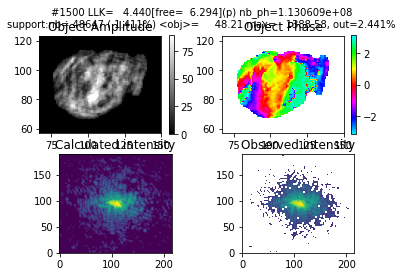

  ER #1600 LLK=   3.671[free=  5.332](p), nb photons=1.118712e+08, support:nb= 48425 ( 1.405%) <obj>=     48.06 max=   1382.94, out=2.012% dt/cycle=0.0095s [PSF]
centering ramp is added back at the end of the reconstruction


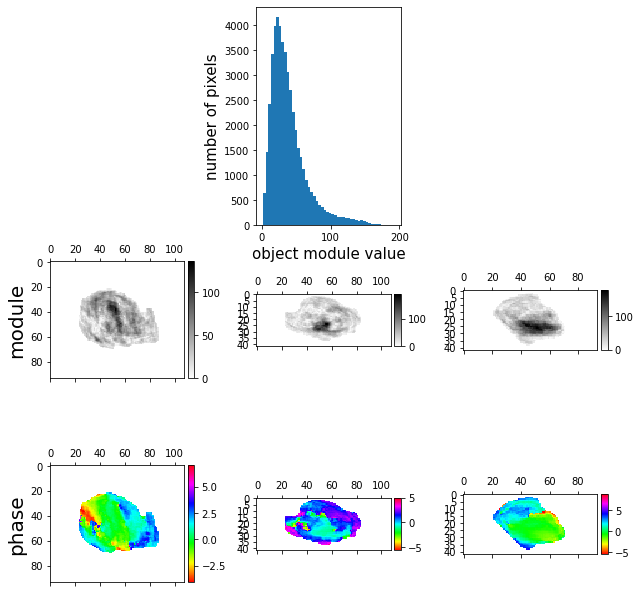

In [10]:
obj, llk, support, return_dict = CDI_one_reconstruction(data, params)

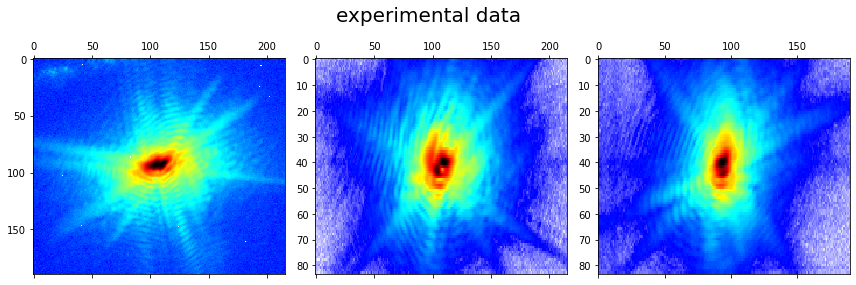

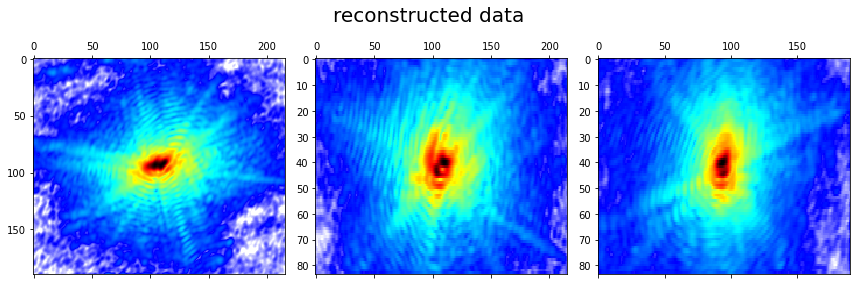

In [11]:
compare_reconstuction_to_real_data(data, obj)

# Several reconstructions

In [9]:
def make_several_reconstructions(data, params, file_dict, Nb_reconstruction):
    for n_reconstruction in range(Nb_reconstruction):
        plt.figure()
        while 1:
            try:
                plt.title(
                    "Reconstruction {}".format(n_reconstruction), fontsize=20
                )
                obj, llk, support = CDI_one_reconstruction(data, params)
                save_reconstruction_best_recon_algo(
                    file_dict, obj, llk, support, n_reconstruction
                )
                break
            except:
                print("\n\nfailed reconstruction\n\n")
                pass
    return

centering_offsets :  [0, 1, 1]
using autocorrelation as support
 HIO #  0 LLK= 289.871[free= 96.972](p), nb photons=6.310773e+02, support:nb= 18391 ( 0.398%) <obj>=      0.19 max=   1167.69, out=10.577% dt/cycle=0.2497s [PSF]


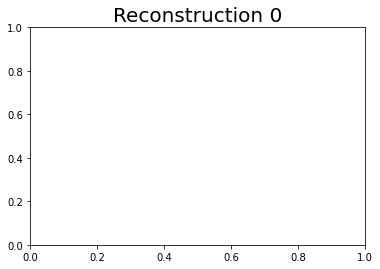

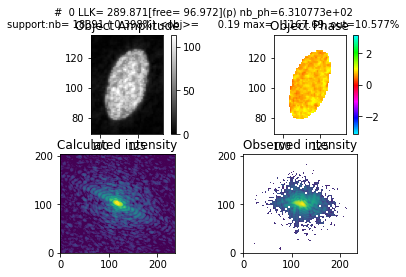

 HIO #100 LLK=   5.989[free=  2.981](p), nb photons=1.457493e+08, support:nb= 91370 ( 1.977%) <obj>=     39.94 max=   1652.39, out=0.076% dt/cycle=0.0104s [PSF]
 HIO #200 LLK=   5.142[free=  2.796](p), nb photons=1.388765e+08, support:nb=103376 ( 2.237%) <obj>=     36.65 max=   1664.75, out=0.039% dt/cycle=0.0026s [PSF]
 HIO #300 LLK=   4.530[free=  2.496](p), nb photons=1.330612e+08, support:nb=110839 ( 2.398%) <obj>=     34.65 max=   1673.59, out=0.047% dt/cycle=0.0026s [PSF]
RAAR #400 LLK=   4.507[free=  2.381](p), nb photons=1.314571e+08, support:nb=110589 ( 2.393%) <obj>=     34.48 max=   1663.77, out=0.088% dt/cycle=0.0026s [PSF]
RAAR #500 LLK=   3.181[free=  2.916](p), nb photons=1.179926e+08, support:nb= 88750 ( 1.920%) <obj>=     36.46 max=   1615.29, out=1.355% dt/cycle=0.0026s [PSF]
RAAR #600 LLK=   5.418[free=  5.189](p), nb photons=1.191143e+08, support:nb= 73147 ( 1.583%) <obj>=     40.35 max=   1544.91, out=2.112% dt/cycle=0.0026s [PSF]
RAAR #700 LLK=   5.548[free=  5.62

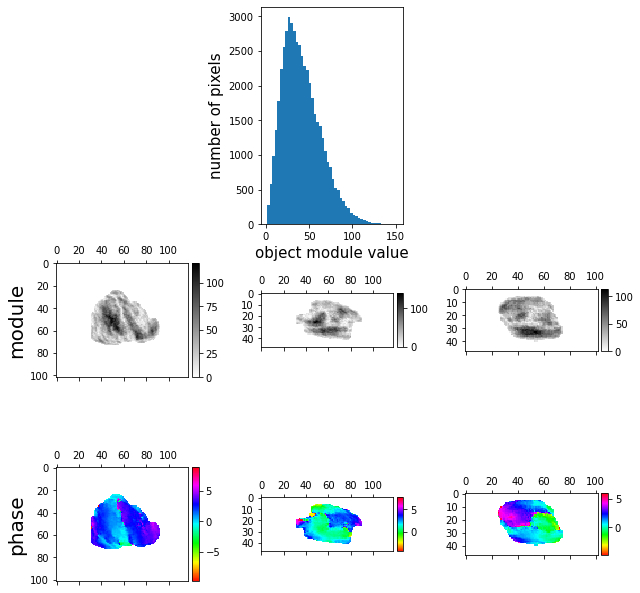

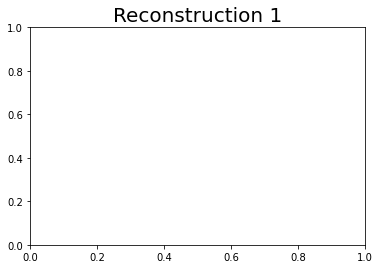

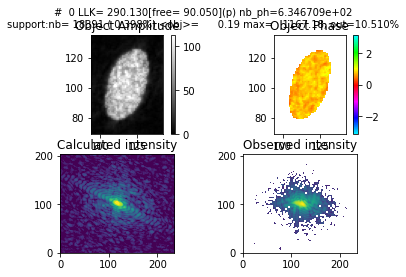

 HIO #100 LLK=   6.449[free=  3.065](p), nb photons=1.479109e+08, support:nb= 77915 ( 1.686%) <obj>=     43.57 max=   1608.31, out=0.040% dt/cycle=0.0191s [PSF]
 HIO #200 LLK=   6.155[free=  3.232](p), nb photons=1.436778e+08, support:nb= 83486 ( 1.806%) <obj>=     41.48 max=   1603.10, out=0.019% dt/cycle=0.0026s [PSF]
 HIO #300 LLK=   5.965[free=  3.071](p), nb photons=1.405696e+08, support:nb= 83226 ( 1.801%) <obj>=     41.10 max=   1585.31, out=0.060% dt/cycle=0.0026s [PSF]
RAAR #400 LLK=   6.414[free=  3.094](p), nb photons=1.418155e+08, support:nb= 74664 ( 1.615%) <obj>=     43.58 max=   1545.20, out=0.085% dt/cycle=0.0026s [PSF]
RAAR #500 LLK=   3.259[free=  2.033](p), nb photons=1.187138e+08, support:nb= 58005 ( 1.255%) <obj>=     45.24 max=   1495.76, out=1.153% dt/cycle=0.0026s [PSF]
RAAR #600 LLK=   3.764[free=  2.818](p), nb photons=1.173600e+08, support:nb= 52388 ( 1.133%) <obj>=     47.33 max=   1457.57, out=1.372% dt/cycle=0.0026s [PSF]
RAAR #700 LLK= 63438045000000000.0

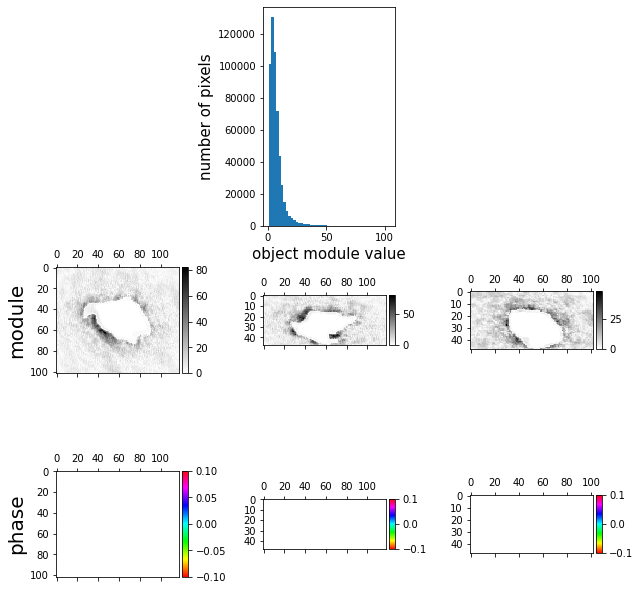

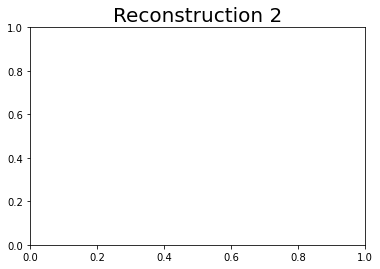

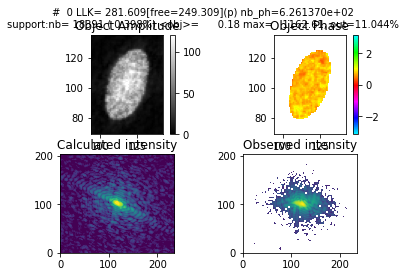

 HIO #100 LLK=   5.656[free=  6.873](p), nb photons=1.461710e+08, support:nb=100322 ( 2.171%) <obj>=     38.17 max=   1679.03, out=0.130% dt/cycle=0.0189s [PSF]
 HIO #200 LLK=   4.703[free=  5.597](p), nb photons=1.387742e+08, support:nb=116439 ( 2.519%) <obj>=     34.52 max=   1696.98, out=0.077% dt/cycle=0.0026s [PSF]
 HIO #300 LLK=   4.019[free=  4.398](p), nb photons=1.324175e+08, support:nb=125319 ( 2.711%) <obj>=     32.51 max=   1692.63, out=0.085% dt/cycle=0.0026s [PSF]
RAAR #400 LLK=   3.982[free=  3.746](p), nb photons=1.298718e+08, support:nb=123012 ( 2.662%) <obj>=     32.49 max=   1663.19, out=0.148% dt/cycle=0.0026s [PSF]
RAAR #500 LLK=   6.659[free=  7.652](p), nb photons=1.223524e+08, support:nb= 99694 ( 2.157%) <obj>=     35.03 max=   1592.49, out=2.528% dt/cycle=0.0026s [PSF]
RAAR #600 LLK=   4.937[free=  5.984](p), nb photons=1.179051e+08, support:nb= 83684 ( 1.811%) <obj>=     37.54 max=   1555.94, out=2.038% dt/cycle=0.0026s [PSF]
RAAR #700 LLK=  86.314[free= 23.02

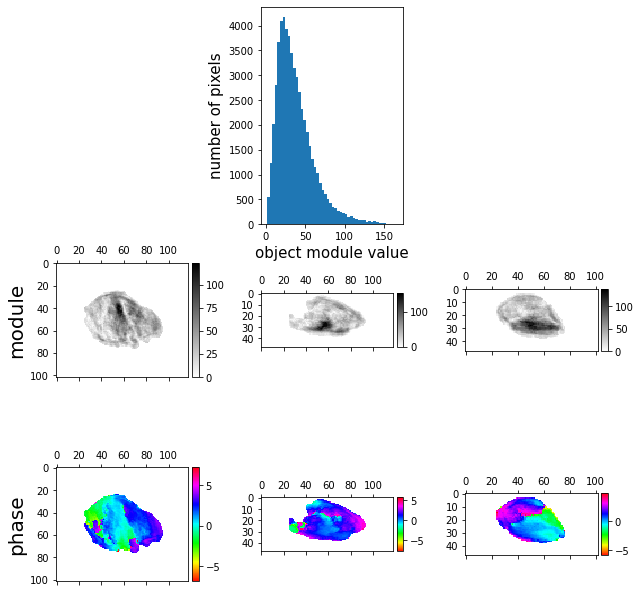

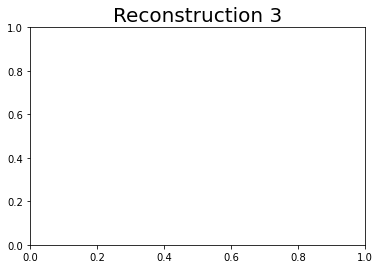

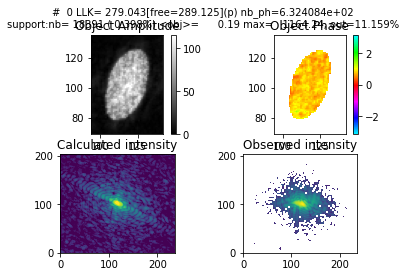

 HIO #100 LLK=   6.465[free=  7.521](p), nb photons=1.483359e+08, support:nb= 71912 ( 1.556%) <obj>=     45.42 max=   1580.45, out=0.040% dt/cycle=0.0189s [PSF]
 HIO #200 LLK=   6.310[free=  6.486](p), nb photons=1.450114e+08, support:nb= 77518 ( 1.677%) <obj>=     43.25 max=   1581.69, out=0.022% dt/cycle=0.0026s [PSF]
 HIO #300 LLK=   6.317[free=  5.807](p), nb photons=1.427789e+08, support:nb= 76259 ( 1.650%) <obj>=     43.27 max=   1561.36, out=0.060% dt/cycle=0.0026s [PSF]
RAAR #400 LLK=   6.795[free=  5.459](p), nb photons=1.442180e+08, support:nb= 69176 ( 1.497%) <obj>=     45.66 max=   1524.20, out=0.081% dt/cycle=0.0026s [PSF]
RAAR #500 LLK=   3.298[free=  3.841](p), nb photons=1.191402e+08, support:nb= 54926 ( 1.188%) <obj>=     46.57 max=   1480.94, out=1.047% dt/cycle=0.0026s [PSF]
RAAR #600 LLK=   4.704[free=  5.470](p), nb photons=1.190939e+08, support:nb= 50385 ( 1.090%) <obj>=     48.62 max=   1440.99, out=1.613% dt/cycle=0.0026s [PSF]
RAAR #700 LLK= 87660750000000000.0

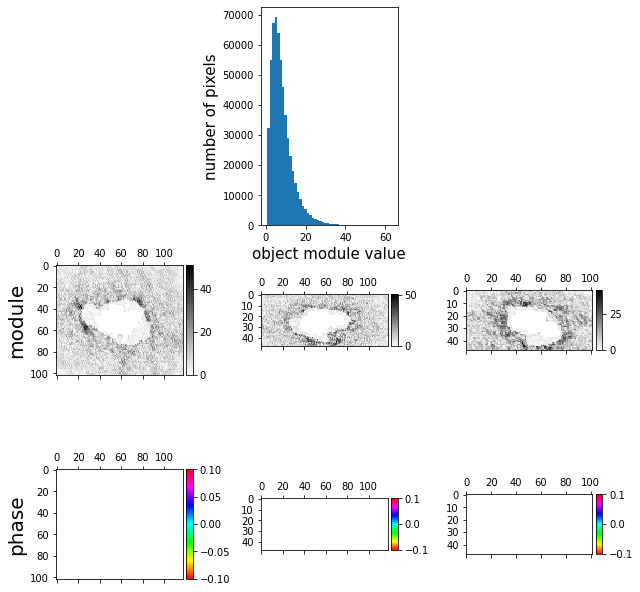

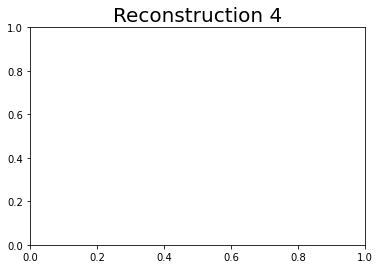

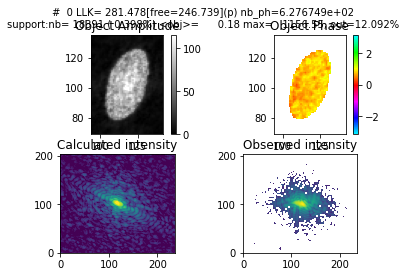

 HIO #100 LLK=   5.960[free=  4.499](p), nb photons=1.458352e+08, support:nb= 85768 ( 1.856%) <obj>=     41.24 max=   1633.26, out=0.075% dt/cycle=0.0195s [PSF]
 HIO #200 LLK=   5.258[free=  3.984](p), nb photons=1.395545e+08, support:nb= 94212 ( 2.038%) <obj>=     38.49 max=   1630.08, out=0.033% dt/cycle=0.0026s [PSF]
 HIO #300 LLK=   4.703[free=  3.391](p), nb photons=1.343014e+08, support:nb=100818 ( 2.181%) <obj>=     36.50 max=   1640.06, out=0.048% dt/cycle=0.0026s [PSF]
RAAR #400 LLK=   4.805[free=  3.085](p), nb photons=1.332031e+08, support:nb= 99186 ( 2.146%) <obj>=     36.65 max=   1621.26, out=0.062% dt/cycle=0.0026s [PSF]
RAAR #500 LLK=   3.268[free=  3.038](p), nb photons=1.178805e+08, support:nb= 75605 ( 1.636%) <obj>=     39.49 max=   1561.78, out=1.380% dt/cycle=0.0026s [PSF]
RAAR #600 LLK=   4.802[free=  4.855](p), nb photons=1.175116e+08, support:nb= 62483 ( 1.352%) <obj>=     43.37 max=   1498.70, out=1.941% dt/cycle=0.0026s [PSF]
RAAR #700 LLK=   6.119[free=  5.74

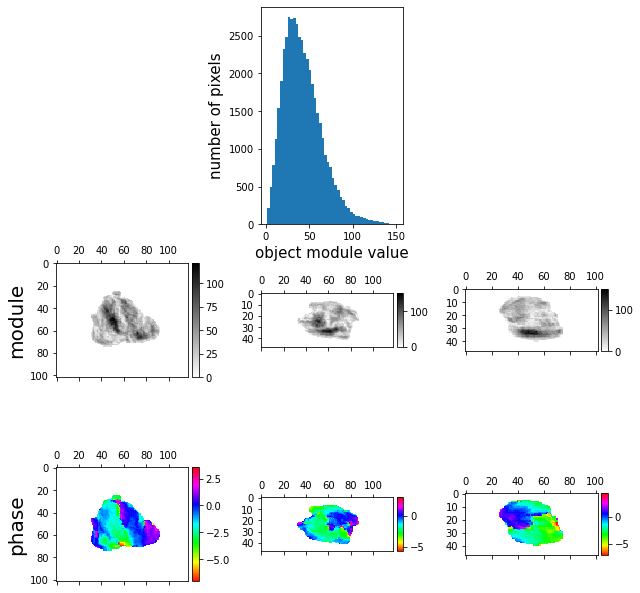

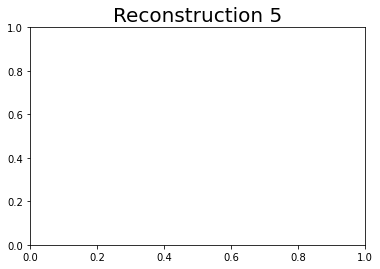

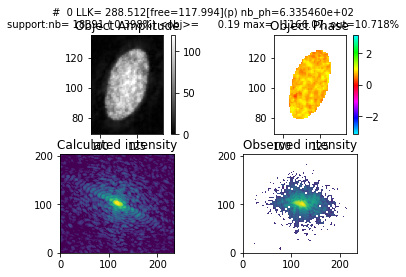

 HIO #100 LLK=   5.911[free=  3.483](p), nb photons=1.458748e+08, support:nb= 92989 ( 2.012%) <obj>=     39.61 max=   1655.68, out=0.077% dt/cycle=0.0191s [PSF]
 HIO #200 LLK=   4.977[free=  3.128](p), nb photons=1.383206e+08, support:nb=103976 ( 2.250%) <obj>=     36.47 max=   1658.65, out=0.046% dt/cycle=0.0026s [PSF]
 HIO #300 LLK=   4.637[free=  2.783](p), nb photons=1.345729e+08, support:nb=106266 ( 2.299%) <obj>=     35.59 max=   1633.75, out=0.046% dt/cycle=0.0026s [PSF]
RAAR #400 LLK=   4.670[free=  2.538](p), nb photons=1.329460e+08, support:nb=103438 ( 2.238%) <obj>=     35.85 max=   1606.25, out=0.057% dt/cycle=0.0026s [PSF]
RAAR #500 LLK=   2.916[free=  2.352](p), nb photons=1.178616e+08, support:nb= 80115 ( 1.733%) <obj>=     38.36 max=   1557.15, out=1.304% dt/cycle=0.0026s [PSF]
RAAR #600 LLK=   4.830[free=  4.429](p), nb photons=1.186735e+08, support:nb= 67597 ( 1.463%) <obj>=     41.90 max=   1499.32, out=2.090% dt/cycle=0.0026s [PSF]
RAAR #700 LLK=   6.432[free=  6.27

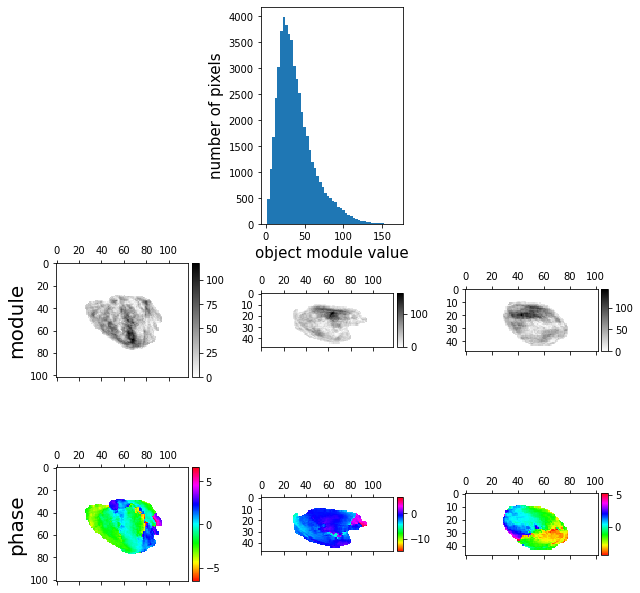

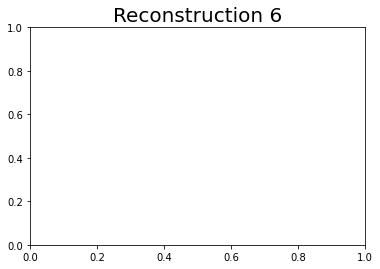

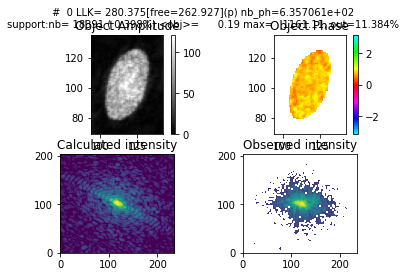

 HIO #100 LLK=   6.239[free=  4.958](p), nb photons=1.477658e+08, support:nb= 78330 ( 1.695%) <obj>=     43.43 max=   1609.68, out=0.042% dt/cycle=0.0185s [PSF]
 HIO #200 LLK=   5.713[free=  4.452](p), nb photons=1.421891e+08, support:nb= 84713 ( 1.833%) <obj>=     40.97 max=   1610.20, out=0.020% dt/cycle=0.0026s [PSF]
 HIO #300 LLK=   5.490[free=  3.955](p), nb photons=1.389545e+08, support:nb= 84403 ( 1.826%) <obj>=     40.57 max=   1591.32, out=0.046% dt/cycle=0.0026s [PSF]
RAAR #400 LLK=   5.950[free=  3.776](p), nb photons=1.397167e+08, support:nb= 77953 ( 1.687%) <obj>=     42.34 max=   1554.83, out=0.068% dt/cycle=0.0026s [PSF]
RAAR #500 LLK=   3.138[free=  2.809](p), nb photons=1.182659e+08, support:nb= 61083 ( 1.322%) <obj>=     44.00 max=   1506.64, out=1.192% dt/cycle=0.0026s [PSF]
RAAR #600 LLK=   3.903[free=  3.969](p), nb photons=1.176199e+08, support:nb= 54825 ( 1.186%) <obj>=     46.32 max=   1466.29, out=1.614% dt/cycle=0.0026s [PSF]
RAAR #700 LLK=   6.412[free=  6.33

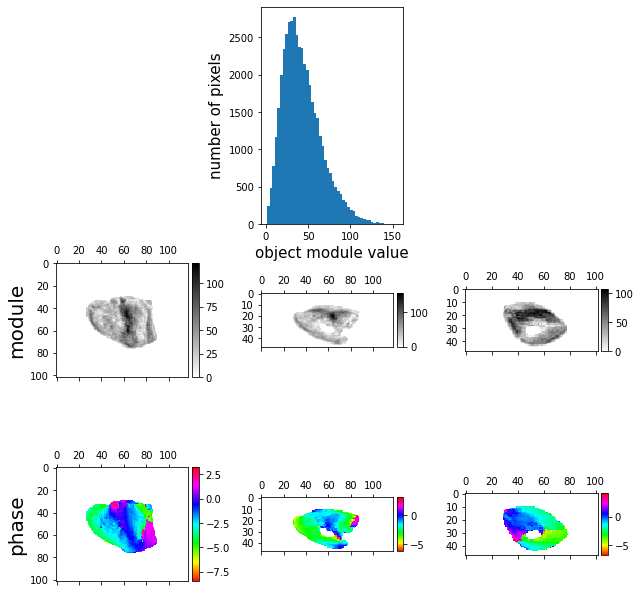

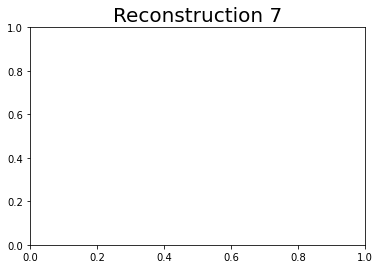

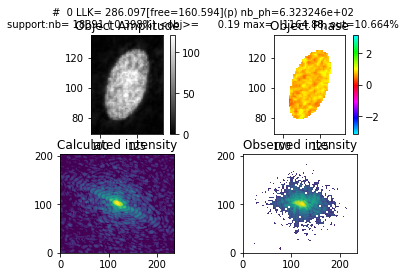

 HIO #100 LLK=   5.887[free=  3.836](p), nb photons=1.459592e+08, support:nb= 93694 ( 2.027%) <obj>=     39.47 max=   1656.92, out=0.083% dt/cycle=0.0191s [PSF]
 HIO #200 LLK=   4.926[free=  3.166](p), nb photons=1.380339e+08, support:nb=104770 ( 2.267%) <obj>=     36.30 max=   1657.84, out=0.055% dt/cycle=0.0026s [PSF]
 HIO #300 LLK=   4.529[free=  2.769](p), nb photons=1.336928e+08, support:nb=106215 ( 2.298%) <obj>=     35.48 max=   1631.29, out=0.054% dt/cycle=0.0026s [PSF]
RAAR #400 LLK=   4.731[free=  2.630](p), nb photons=1.326648e+08, support:nb=103122 ( 2.231%) <obj>=     35.87 max=   1605.08, out=0.077% dt/cycle=0.0026s [PSF]
RAAR #500 LLK=   3.662[free=  3.135](p), nb photons=1.187154e+08, support:nb= 80835 ( 1.749%) <obj>=     38.32 max=   1557.83, out=2.036% dt/cycle=0.0026s [PSF]
RAAR #600 LLK=   5.007[free=  5.162](p), nb photons=1.183735e+08, support:nb= 69138 ( 1.496%) <obj>=     41.38 max=   1510.94, out=1.779% dt/cycle=0.0026s [PSF]
RAAR #700 LLK=   5.131[free=  5.23

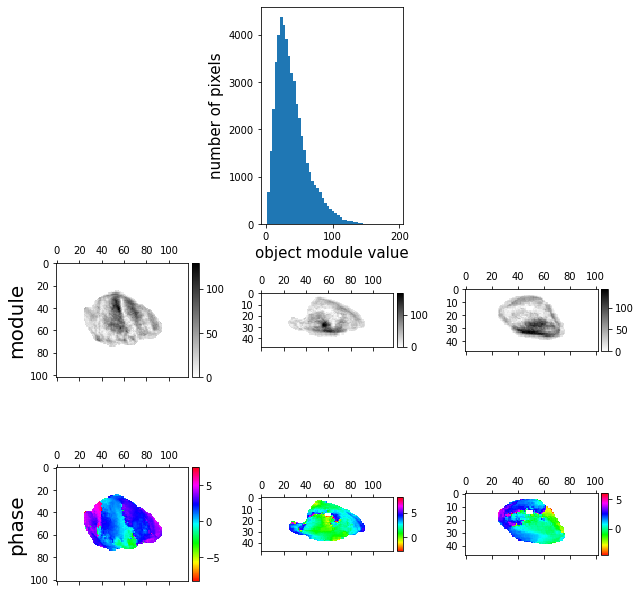

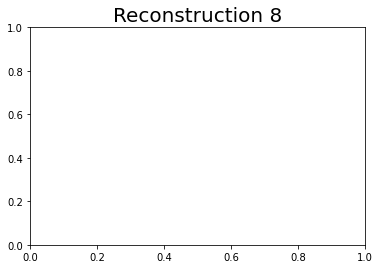

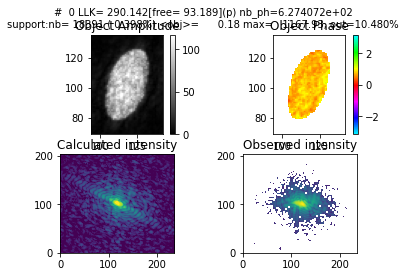

 HIO #100 LLK=   5.784[free=  3.228](p), nb photons=1.453758e+08, support:nb=101667 ( 2.200%) <obj>=     37.81 max=   1678.33, out=0.112% dt/cycle=0.0186s [PSF]
 HIO #200 LLK=   4.728[free=  2.884](p), nb photons=1.374195e+08, support:nb=117173 ( 2.535%) <obj>=     34.25 max=   1690.53, out=0.071% dt/cycle=0.0026s [PSF]
 HIO #300 LLK=   4.017[free=  2.410](p), nb photons=1.309267e+08, support:nb=126222 ( 2.731%) <obj>=     32.21 max=   1688.71, out=0.081% dt/cycle=0.0026s [PSF]
RAAR #400 LLK=   3.930[free=  2.217](p), nb photons=1.281512e+08, support:nb=128312 ( 2.776%) <obj>=     31.60 max=   1673.28, out=0.149% dt/cycle=0.0026s [PSF]
RAAR #500 LLK=   4.080[free=  3.747](p), nb photons=1.179186e+08, support:nb=106887 ( 2.313%) <obj>=     33.21 max=   1633.21, out=1.856% dt/cycle=0.0026s [PSF]
RAAR #600 LLK=   7.341[free=  7.723](p), nb photons=1.241052e+08, support:nb= 94622 ( 2.047%) <obj>=     36.22 max=   1587.66, out=2.477% dt/cycle=0.0026s [PSF]
RAAR #700 LLK=   6.683[free=  7.09

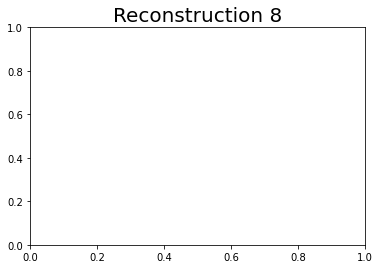

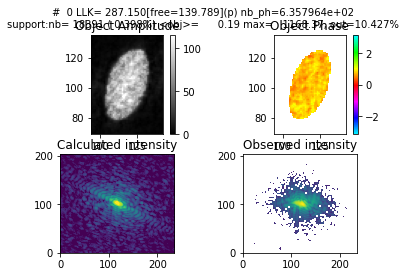

 HIO #100 LLK=   6.540[free=  3.734](p), nb photons=1.482233e+08, support:nb= 75278 ( 1.629%) <obj>=     44.37 max=   1597.09, out=0.037% dt/cycle=0.0099s [PSF]
 HIO #200 LLK=   6.276[free=  3.811](p), nb photons=1.442533e+08, support:nb= 81521 ( 1.764%) <obj>=     42.07 max=   1591.45, out=0.022% dt/cycle=0.0026s [PSF]
 HIO #300 LLK=   6.203[free=  3.660](p), nb photons=1.429011e+08, support:nb= 77568 ( 1.678%) <obj>=     42.92 max=   1567.15, out=0.071% dt/cycle=0.0026s [PSF]
RAAR #400 LLK=   6.813[free=  3.762](p), nb photons=1.447142e+08, support:nb= 71037 ( 1.537%) <obj>=     45.13 max=   1533.32, out=0.076% dt/cycle=0.0026s [PSF]
RAAR #500 LLK=   3.211[free=  2.438](p), nb photons=1.189699e+08, support:nb= 56830 ( 1.230%) <obj>=     45.75 max=   1493.43, out=1.100% dt/cycle=0.0026s [PSF]
RAAR #600 LLK=  10.830[free=  7.829](p), nb photons=1.409254e+08, support:nb= 51638 ( 1.117%) <obj>=     52.24 max=   1458.23, out=2.633% dt/cycle=0.0026s [PSF]
RAAR #700 LLK=  10.006[free= 10.21

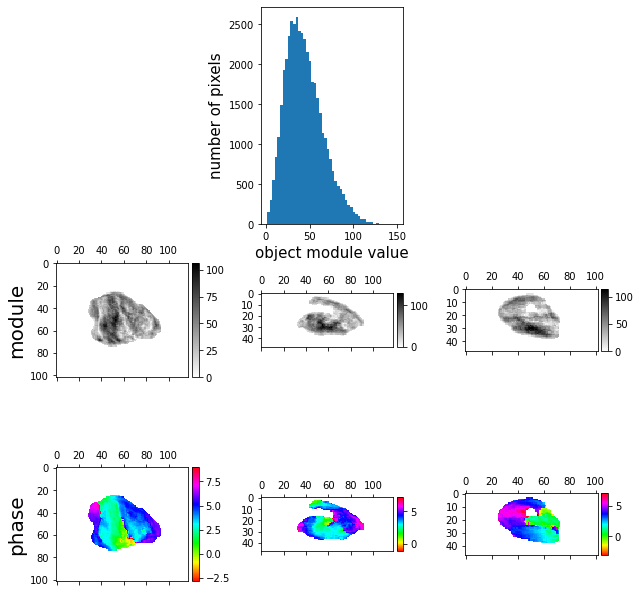

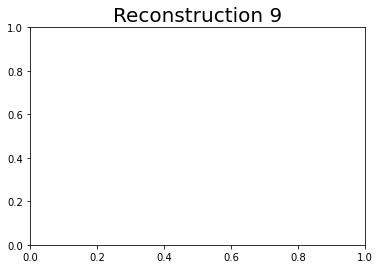

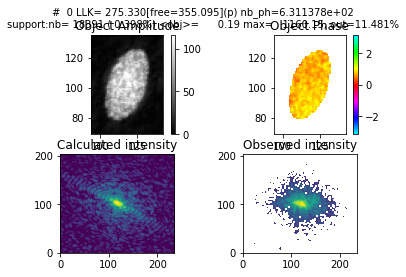

 HIO #100 LLK=   5.896[free=  6.535](p), nb photons=1.446568e+08, support:nb= 83444 ( 1.805%) <obj>=     41.64 max=   1618.96, out=0.065% dt/cycle=0.0189s [PSF]
 HIO #200 LLK=   5.283[free=  5.596](p), nb photons=1.393622e+08, support:nb= 91633 ( 1.983%) <obj>=     39.00 max=   1624.42, out=0.029% dt/cycle=0.0026s [PSF]
 HIO #300 LLK=   4.780[free=  4.899](p), nb photons=1.346362e+08, support:nb= 99889 ( 2.161%) <obj>=     36.71 max=   1633.35, out=0.035% dt/cycle=0.0026s [PSF]
RAAR #400 LLK=   4.629[free=  4.584](p), nb photons=1.326186e+08, support:nb=100401 ( 2.172%) <obj>=     36.34 max=   1623.88, out=0.060% dt/cycle=0.0026s [PSF]
RAAR #500 LLK=   3.009[free=  4.233](p), nb photons=1.179667e+08, support:nb= 80248 ( 1.736%) <obj>=     38.34 max=   1579.41, out=1.235% dt/cycle=0.0026s [PSF]
RAAR #600 LLK=   4.373[free=  5.329](p), nb photons=1.173590e+08, support:nb= 68059 ( 1.473%) <obj>=     41.53 max=   1513.23, out=2.524% dt/cycle=0.0026s [PSF]
RAAR #700 LLK=   7.559[free=  8.20

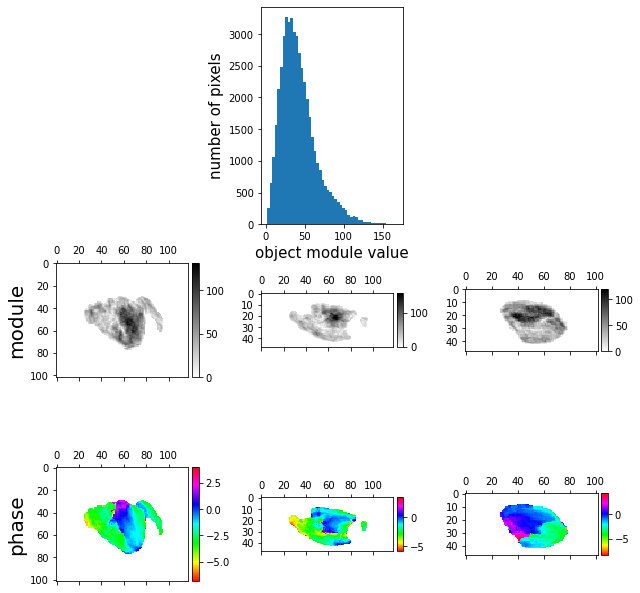

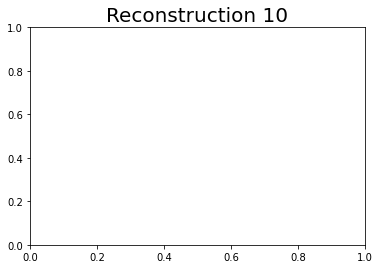

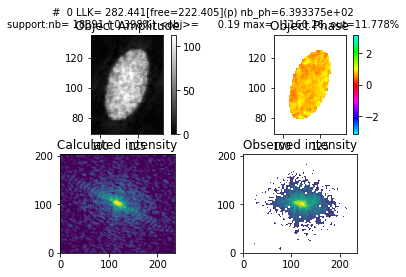

 HIO #100 LLK=   6.415[free=  7.302](p), nb photons=1.490758e+08, support:nb= 73726 ( 1.595%) <obj>=     44.97 max=   1588.87, out=0.036% dt/cycle=0.0189s [PSF]
 HIO #200 LLK=   6.090[free=  6.417](p), nb photons=1.450549e+08, support:nb= 80381 ( 1.739%) <obj>=     42.48 max=   1592.42, out=0.021% dt/cycle=0.0026s [PSF]
 HIO #300 LLK=   6.059[free=  5.760](p), nb photons=1.431795e+08, support:nb= 77996 ( 1.688%) <obj>=     42.85 max=   1567.27, out=0.068% dt/cycle=0.0026s [PSF]
RAAR #400 LLK=   6.606[free=  5.543](p), nb photons=1.444884e+08, support:nb= 71859 ( 1.555%) <obj>=     44.84 max=   1534.63, out=0.049% dt/cycle=0.0026s [PSF]
RAAR #500 LLK=   3.237[free=  3.781](p), nb photons=1.197984e+08, support:nb= 57978 ( 1.254%) <obj>=     45.46 max=   1494.24, out=1.079% dt/cycle=0.0026s [PSF]
RAAR #600 LLK=  24.228[free=  9.892](p), nb photons=1.906193e+08, support:nb= 52906 ( 1.145%) <obj>=     60.02 max=   1454.84, out=3.463% dt/cycle=0.0026s [PSF]
RAAR #700 LLK=   7.008[free=  8.14

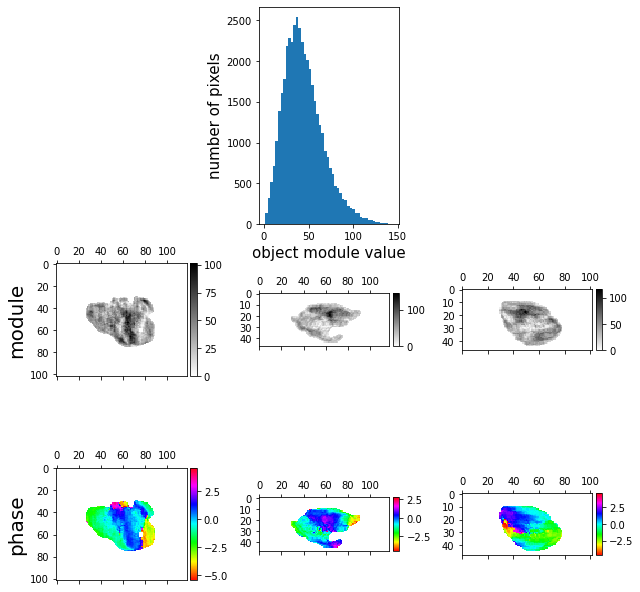

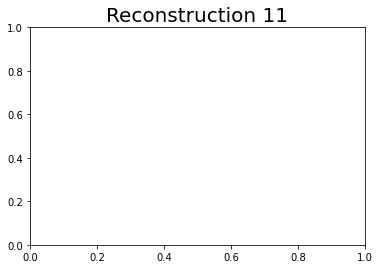

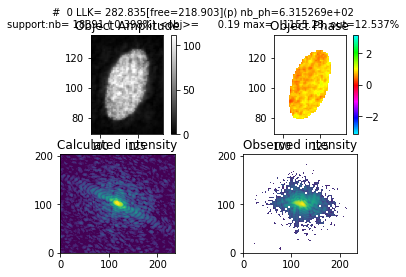

 HIO #100 LLK=   5.865[free=  8.021](p), nb photons=1.469593e+08, support:nb= 87406 ( 1.891%) <obj>=     41.00 max=   1641.09, out=0.059% dt/cycle=0.0189s [PSF]
 HIO #200 LLK=   5.135[free=  6.573](p), nb photons=1.404208e+08, support:nb= 98076 ( 2.122%) <obj>=     37.84 max=   1646.81, out=0.036% dt/cycle=0.0026s [PSF]
 HIO #300 LLK=   4.824[free=  5.333](p), nb photons=1.367894e+08, support:nb= 99792 ( 2.159%) <obj>=     37.02 max=   1628.40, out=0.040% dt/cycle=0.0026s [PSF]
RAAR #400 LLK=   4.976[free=  4.600](p), nb photons=1.357535e+08, support:nb= 95488 ( 2.066%) <obj>=     37.71 max=   1600.60, out=0.054% dt/cycle=0.0026s [PSF]
RAAR #500 LLK=   2.944[free=  3.700](p), nb photons=1.185775e+08, support:nb= 74080 ( 1.603%) <obj>=     40.01 max=   1548.17, out=1.287% dt/cycle=0.0026s [PSF]
RAAR #600 LLK=   4.911[free=  5.557](p), nb photons=1.208385e+08, support:nb= 62504 ( 1.352%) <obj>=     43.97 max=   1495.49, out=1.821% dt/cycle=0.0026s [PSF]
RAAR #700 LLK=  10.813[free= 10.25

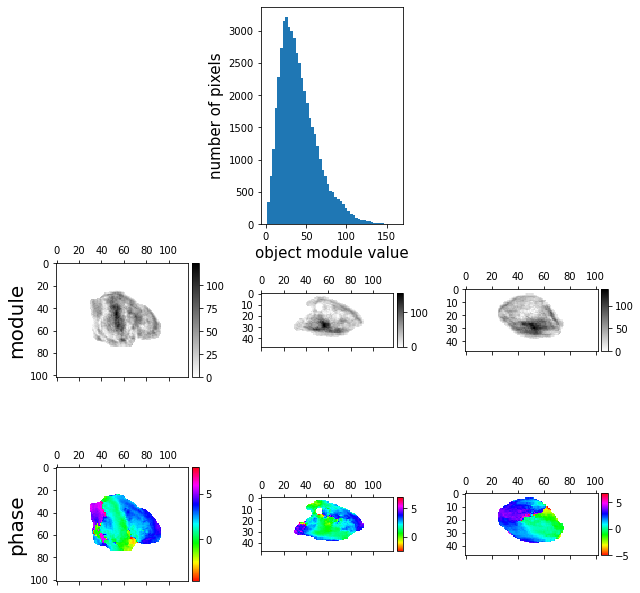

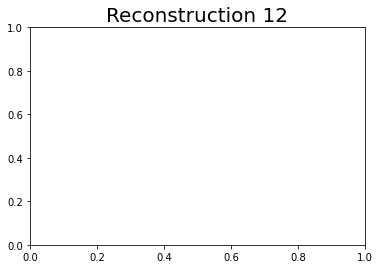

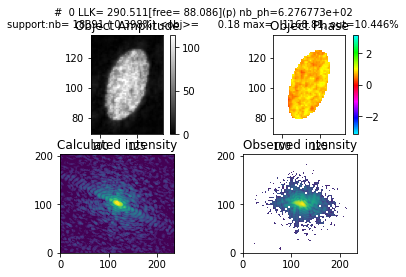

 HIO #100 LLK=   5.707[free=  3.691](p), nb photons=1.453372e+08, support:nb=104731 ( 2.266%) <obj>=     37.25 max=   1687.87, out=0.141% dt/cycle=0.0186s [PSF]
 HIO #200 LLK=   4.614[free=  2.960](p), nb photons=1.371054e+08, support:nb=121979 ( 2.639%) <obj>=     33.53 max=   1699.32, out=0.088% dt/cycle=0.0026s [PSF]
 HIO #300 LLK=   3.943[free=  2.330](p), nb photons=1.306870e+08, support:nb=130608 ( 2.826%) <obj>=     31.63 max=   1687.73, out=0.087% dt/cycle=0.0026s [PSF]
RAAR #400 LLK=   3.978[free=  2.118](p), nb photons=1.283102e+08, support:nb=131465 ( 2.844%) <obj>=     31.24 max=   1663.92, out=0.174% dt/cycle=0.0026s [PSF]
RAAR #500 LLK=   4.926[free=  4.506](p), nb photons=1.191557e+08, support:nb=108069 ( 2.338%) <obj>=     33.21 max=   1609.66, out=2.081% dt/cycle=0.0026s [PSF]
RAAR #600 LLK=   5.077[free=  5.210](p), nb photons=1.183726e+08, support:nb= 93982 ( 2.033%) <obj>=     35.49 max=   1568.55, out=2.247% dt/cycle=0.0026s [PSF]
RAAR #700 LLK=  10.151[free=  7.56

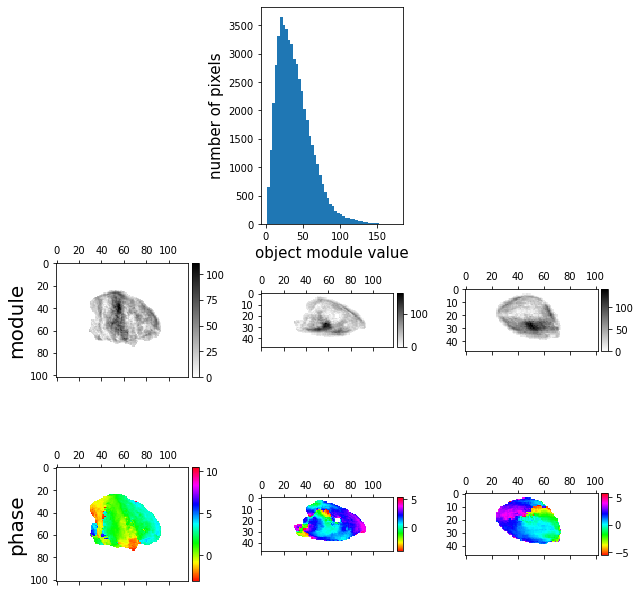

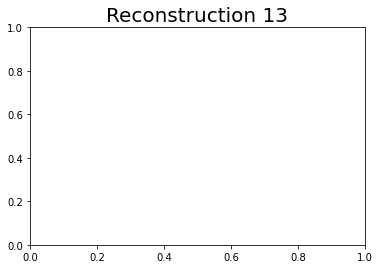

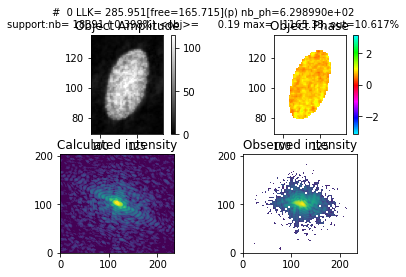

 HIO #100 LLK=   6.025[free=  4.408](p), nb photons=1.463329e+08, support:nb= 85987 ( 1.860%) <obj>=     41.25 max=   1634.00, out=0.057% dt/cycle=0.0191s [PSF]
 HIO #200 LLK=   5.271[free=  3.843](p), nb photons=1.398368e+08, support:nb= 94252 ( 2.039%) <obj>=     38.52 max=   1631.53, out=0.036% dt/cycle=0.0026s [PSF]
 HIO #300 LLK=   4.954[free=  3.385](p), nb photons=1.363720e+08, support:nb= 95390 ( 2.064%) <obj>=     37.81 max=   1611.95, out=0.042% dt/cycle=0.0026s [PSF]
RAAR #400 LLK=   5.225[free=  3.277](p), nb photons=1.359278e+08, support:nb= 89879 ( 1.945%) <obj>=     38.89 max=   1579.42, out=0.051% dt/cycle=0.0026s [PSF]
RAAR #500 LLK=   3.043[free=  2.965](p), nb photons=1.177776e+08, support:nb= 69859 ( 1.512%) <obj>=     41.06 max=   1530.10, out=1.302% dt/cycle=0.0026s [PSF]
RAAR #600 LLK=   4.855[free=  4.937](p), nb photons=1.200261e+08, support:nb= 61153 ( 1.323%) <obj>=     44.30 max=   1484.32, out=2.114% dt/cycle=0.0026s [PSF]


failed reconstruction


centerin

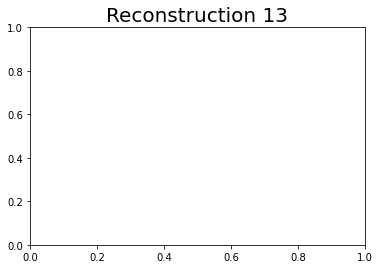

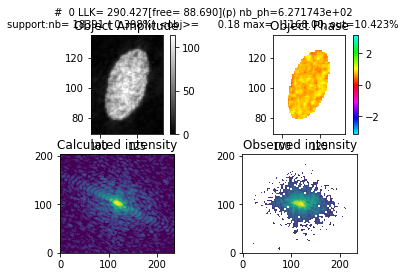

 HIO #100 LLK=   5.884[free=  2.924](p), nb photons=1.456610e+08, support:nb= 97022 ( 2.099%) <obj>=     38.75 max=   1666.54, out=0.090% dt/cycle=0.0110s [PSF]
 HIO #200 LLK=   4.885[free=  2.605](p), nb photons=1.378924e+08, support:nb=111532 ( 2.413%) <obj>=     35.16 max=   1676.00, out=0.054% dt/cycle=0.0026s [PSF]
 HIO #300 LLK=   4.209[free=  2.206](p), nb photons=1.318488e+08, support:nb=120290 ( 2.603%) <obj>=     33.11 max=   1672.87, out=0.067% dt/cycle=0.0026s [PSF]
RAAR #400 LLK=   4.098[free=  1.948](p), nb photons=1.289991e+08, support:nb=121520 ( 2.629%) <obj>=     32.58 max=   1657.82, out=0.105% dt/cycle=0.0026s [PSF]
RAAR #500 LLK=   3.038[free=  2.411](p), nb photons=1.167402e+08, support:nb= 99560 ( 2.154%) <obj>=     34.24 max=   1604.71, out=1.488% dt/cycle=0.0026s [PSF]
RAAR #600 LLK=   5.438[free=  5.545](p), nb photons=1.183042e+08, support:nb= 86212 ( 1.865%) <obj>=     37.04 max=   1546.56, out=1.998% dt/cycle=0.0026s [PSF]
RAAR #700 LLK=   6.461[free=  6.32

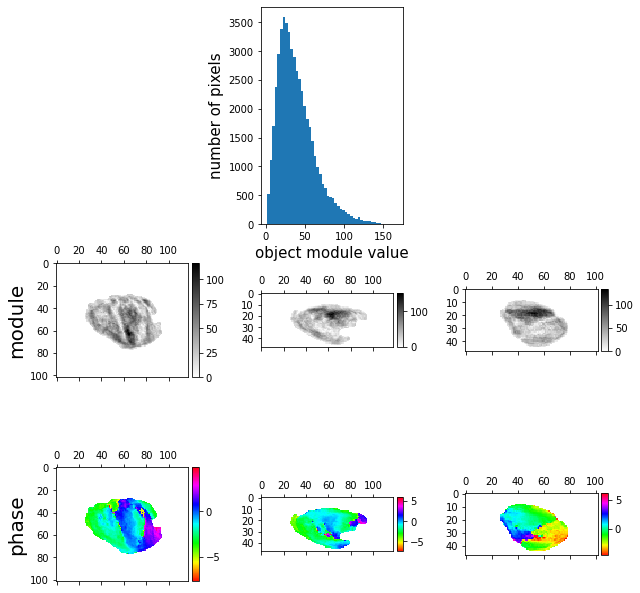

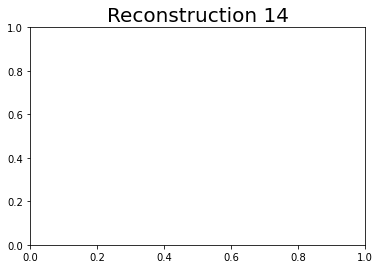

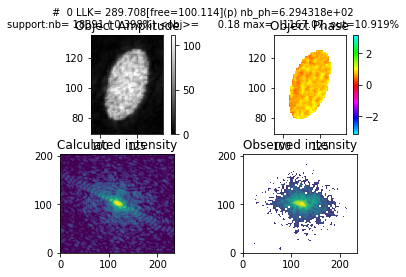

 HIO #100 LLK=   5.873[free=  6.155](p), nb photons=1.460248e+08, support:nb= 88470 ( 1.914%) <obj>=     40.63 max=   1645.26, out=0.070% dt/cycle=0.0189s [PSF]
 HIO #200 LLK=   5.126[free=  5.106](p), nb photons=1.395008e+08, support:nb= 98569 ( 2.133%) <obj>=     37.62 max=   1647.35, out=0.037% dt/cycle=0.0026s [PSF]
 HIO #300 LLK=   4.688[free=  4.153](p), nb photons=1.351817e+08, support:nb=105005 ( 2.272%) <obj>=     35.88 max=   1642.62, out=0.041% dt/cycle=0.0026s [PSF]
RAAR #400 LLK=   4.725[free=  3.519](p), nb photons=1.335965e+08, support:nb=101258 ( 2.191%) <obj>=     36.32 max=   1616.32, out=0.059% dt/cycle=0.0026s [PSF]
RAAR #500 LLK=   2.958[free=  3.037](p), nb photons=1.182559e+08, support:nb= 77742 ( 1.682%) <obj>=     39.00 max=   1563.41, out=1.347% dt/cycle=0.0026s [PSF]
RAAR #600 LLK=   4.563[free=  4.917](p), nb photons=1.184476e+08, support:nb= 67189 ( 1.454%) <obj>=     41.99 max=   1514.84, out=3.146% dt/cycle=0.0026s [PSF]
RAAR #700 LLK=   6.727[free=  6.80

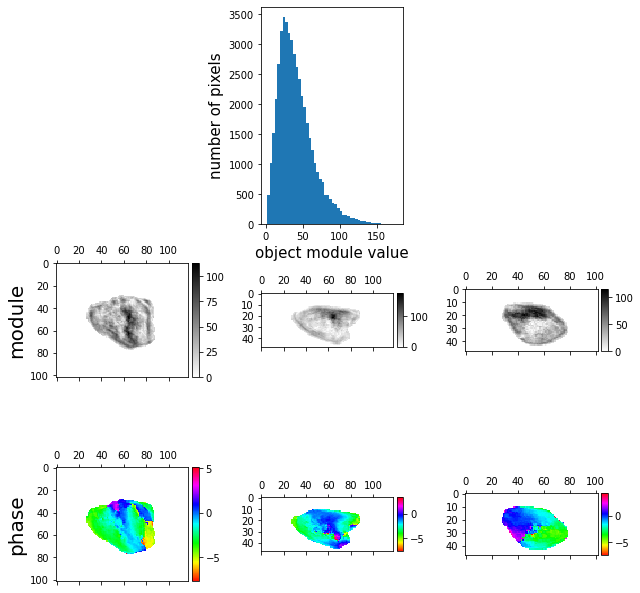

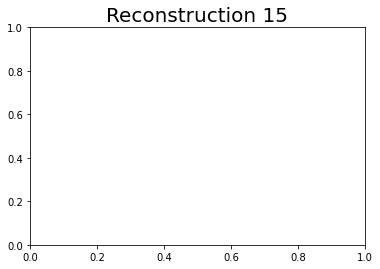

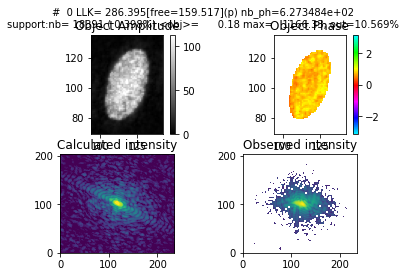

 HIO #100 LLK=   5.916[free=  3.895](p), nb photons=1.460659e+08, support:nb= 91954 ( 1.990%) <obj>=     39.86 max=   1654.43, out=0.081% dt/cycle=0.0189s [PSF]
 HIO #200 LLK=   5.079[free=  3.476](p), nb photons=1.387810e+08, support:nb=102985 ( 2.228%) <obj>=     36.71 max=   1658.30, out=0.037% dt/cycle=0.0026s [PSF]
 HIO #300 LLK=   4.551[free=  2.837](p), nb photons=1.332695e+08, support:nb=108994 ( 2.358%) <obj>=     34.97 max=   1662.24, out=0.048% dt/cycle=0.0026s [PSF]
RAAR #400 LLK=   4.609[free=  2.514](p), nb photons=1.320726e+08, support:nb=102118 ( 2.209%) <obj>=     35.96 max=   1631.44, out=0.072% dt/cycle=0.0026s [PSF]
RAAR #500 LLK=   2.994[free=  2.473](p), nb photons=1.176541e+08, support:nb= 81923 ( 1.773%) <obj>=     37.90 max=   1587.49, out=1.367% dt/cycle=0.0026s [PSF]
RAAR #600 LLK=   5.945[free=  6.223](p), nb photons=1.209382e+08, support:nb= 72242 ( 1.563%) <obj>=     40.92 max=   1538.67, out=2.581% dt/cycle=0.0026s [PSF]
RAAR #700 LLK=   6.565[free=  6.69

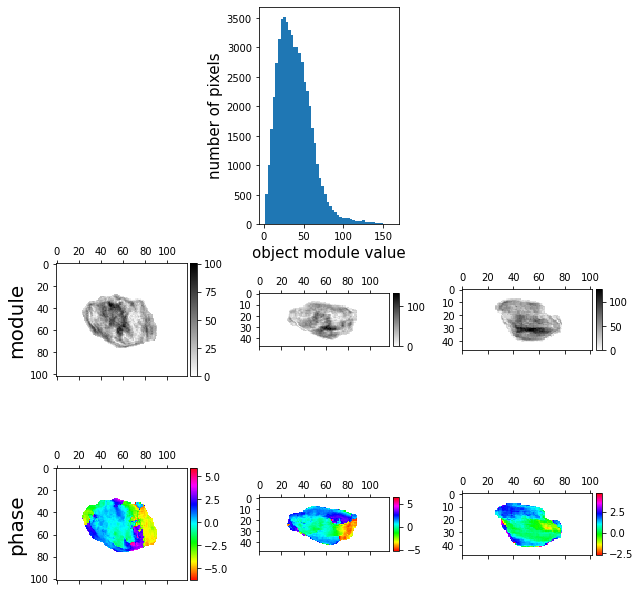

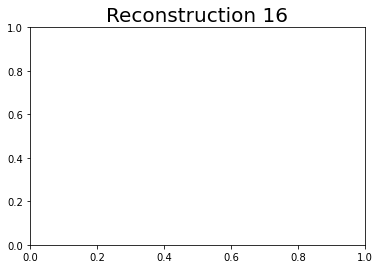

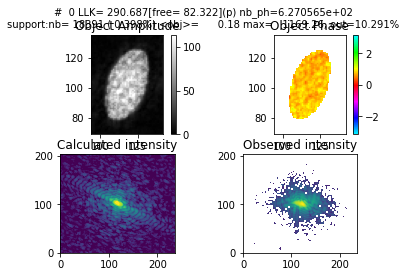

 HIO #100 LLK=   5.976[free=  2.502](p), nb photons=1.455508e+08, support:nb= 91392 ( 1.977%) <obj>=     39.91 max=   1652.08, out=0.077% dt/cycle=0.0188s [PSF]
 HIO #200 LLK=   5.112[free=  2.321](p), nb photons=1.381688e+08, support:nb=102111 ( 2.209%) <obj>=     36.78 max=   1650.21, out=0.044% dt/cycle=0.0026s [PSF]
 HIO #300 LLK=   4.699[free=  2.138](p), nb photons=1.342343e+08, support:nb=105445 ( 2.281%) <obj>=     35.68 max=   1628.43, out=0.048% dt/cycle=0.0026s [PSF]
RAAR #400 LLK=   4.773[free=  2.052](p), nb photons=1.331299e+08, support:nb=102089 ( 2.209%) <obj>=     36.11 max=   1599.56, out=0.075% dt/cycle=0.0026s [PSF]
RAAR #500 LLK=   2.936[free=  1.958](p), nb photons=1.173664e+08, support:nb= 78418 ( 1.697%) <obj>=     38.69 max=   1548.15, out=1.443% dt/cycle=0.0026s [PSF]
RAAR #600 LLK=   4.828[free=  4.272](p), nb photons=1.182438e+08, support:nb= 66845 ( 1.446%) <obj>=     42.06 max=   1494.38, out=2.135% dt/cycle=0.0026s [PSF]
RAAR #700 LLK=   8.289[free=  8.38

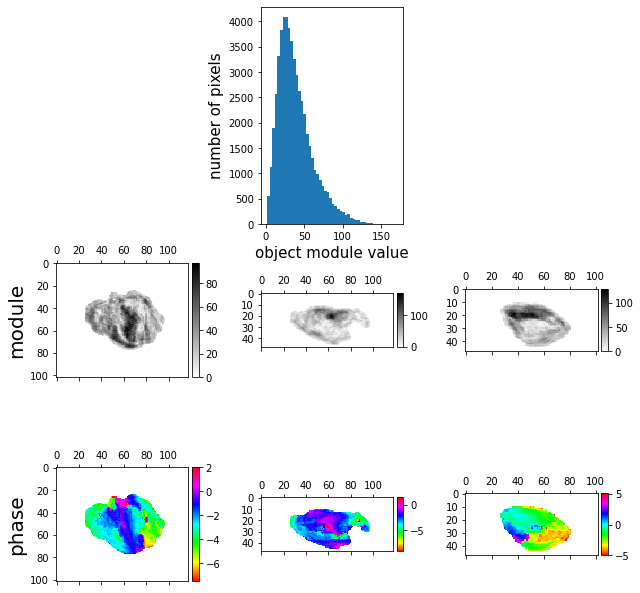

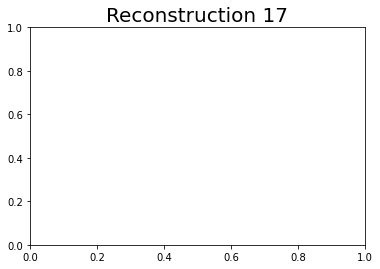

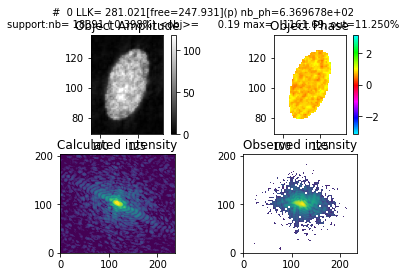

 HIO #100 LLK=   6.648[free=  6.574](p), nb photons=1.501901e+08, support:nb= 71655 ( 1.550%) <obj>=     45.78 max=   1582.78, out=0.034% dt/cycle=0.0192s [PSF]
 HIO #200 LLK=   6.573[free=  5.718](p), nb photons=1.470621e+08, support:nb= 77103 ( 1.668%) <obj>=     43.67 max=   1577.83, out=0.018% dt/cycle=0.0026s [PSF]
 HIO #300 LLK=   6.437[free=  5.174](p), nb photons=1.441692e+08, support:nb= 75629 ( 1.636%) <obj>=     43.66 max=   1556.67, out=0.046% dt/cycle=0.0026s [PSF]
RAAR #400 LLK=   7.069[free=  5.108](p), nb photons=1.462191e+08, support:nb= 68336 ( 1.479%) <obj>=     46.26 max=   1521.23, out=0.098% dt/cycle=0.0026s [PSF]
RAAR #500 LLK=   3.269[free=  3.493](p), nb photons=1.195000e+08, support:nb= 54575 ( 1.181%) <obj>=     46.79 max=   1481.61, out=1.056% dt/cycle=0.0026s [PSF]
RAAR #600 LLK=   3.850[free=  4.158](p), nb photons=1.187757e+08, support:nb= 50133 ( 1.085%) <obj>=     48.67 max=   1448.52, out=1.373% dt/cycle=0.0026s [PSF]
RAAR #700 LLK=   5.943[free=  6.87

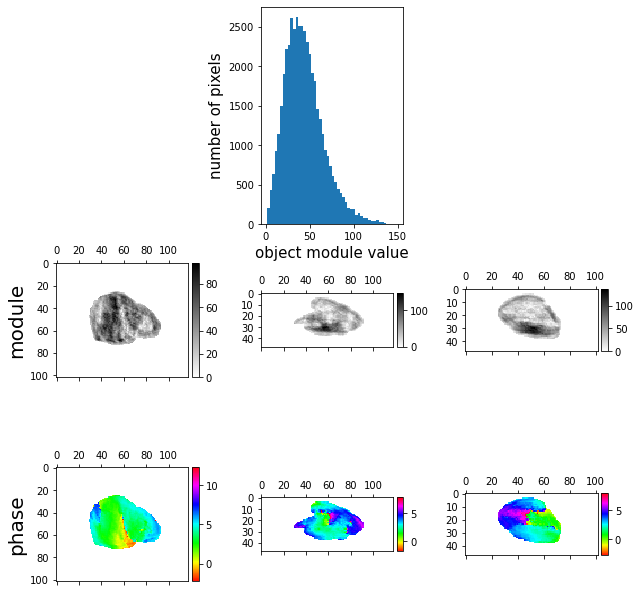

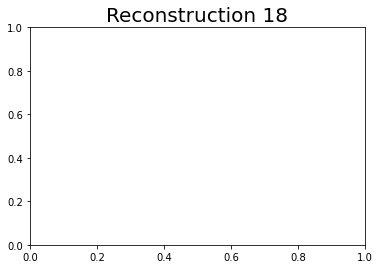

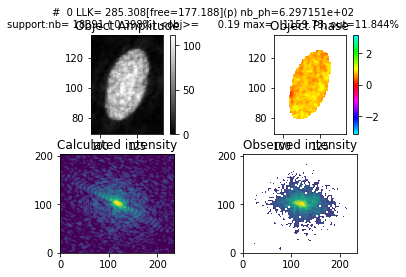

 HIO #100 LLK=   6.038[free=  5.787](p), nb photons=1.470296e+08, support:nb= 84912 ( 1.837%) <obj>=     41.61 max=   1634.56, out=0.058% dt/cycle=0.0190s [PSF]
 HIO #200 LLK=   5.364[free=  4.975](p), nb photons=1.409316e+08, support:nb= 93698 ( 2.027%) <obj>=     38.78 max=   1634.30, out=0.033% dt/cycle=0.0026s [PSF]
 HIO #300 LLK=   5.020[free=  4.318](p), nb photons=1.372822e+08, support:nb= 95008 ( 2.056%) <obj>=     38.01 max=   1618.43, out=0.047% dt/cycle=0.0026s [PSF]
RAAR #400 LLK=   5.346[free=  4.021](p), nb photons=1.373376e+08, support:nb= 88605 ( 1.917%) <obj>=     39.37 max=   1583.67, out=0.060% dt/cycle=0.0026s [PSF]
RAAR #500 LLK=   3.038[free=  3.335](p), nb photons=1.183625e+08, support:nb= 69329 ( 1.500%) <obj>=     41.32 max=   1534.91, out=1.316% dt/cycle=0.0026s [PSF]
RAAR #600 LLK=   3.892[free=  4.190](p), nb photons=1.175756e+08, support:nb= 61294 ( 1.326%) <obj>=     43.80 max=   1492.82, out=1.680% dt/cycle=0.0026s [PSF]
RAAR #700 LLK=   8.608[free=  8.24

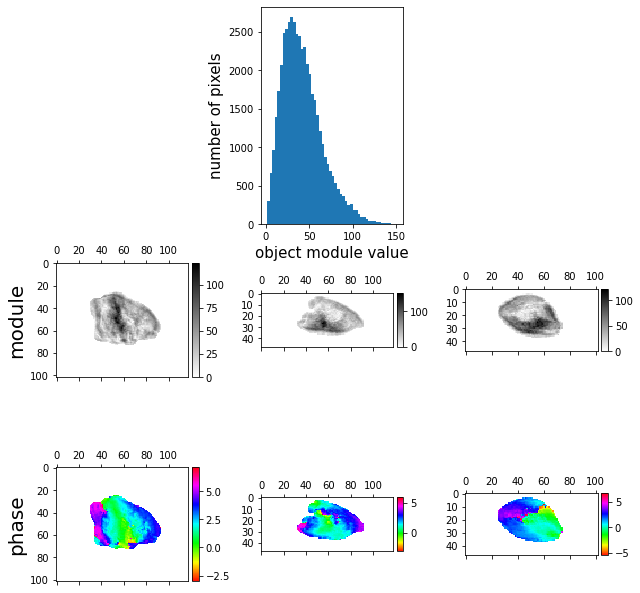

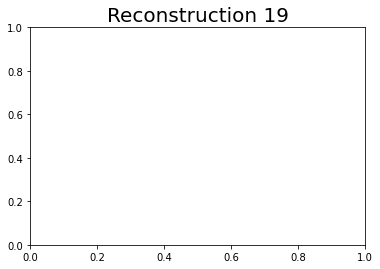

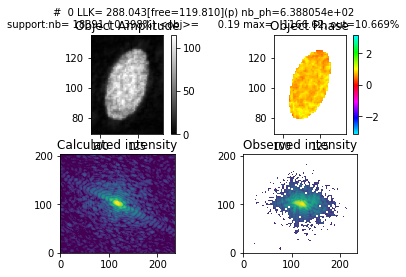

 HIO #100 LLK=   5.791[free=  3.423](p), nb photons=1.452485e+08, support:nb= 97844 ( 2.117%) <obj>=     38.53 max=   1669.52, out=0.100% dt/cycle=0.0189s [PSF]
 HIO #200 LLK=   4.884[free=  3.029](p), nb photons=1.380965e+08, support:nb=109573 ( 2.371%) <obj>=     35.50 max=   1673.59, out=0.052% dt/cycle=0.0026s [PSF]
 HIO #300 LLK=   4.324[free=  2.615](p), nb photons=1.327992e+08, support:nb=115936 ( 2.508%) <obj>=     33.84 max=   1666.87, out=0.051% dt/cycle=0.0026s [PSF]
RAAR #400 LLK=   4.331[free=  2.364](p), nb photons=1.309021e+08, support:nb=114538 ( 2.478%) <obj>=     33.81 max=   1647.32, out=0.081% dt/cycle=0.0026s [PSF]
RAAR #500 LLK=   2.953[free=  2.528](p), nb photons=1.171219e+08, support:nb= 92970 ( 2.012%) <obj>=     35.49 max=   1607.68, out=1.394% dt/cycle=0.0026s [PSF]
RAAR #600 LLK=   4.538[free=  4.168](p), nb photons=1.173498e+08, support:nb= 77493 ( 1.677%) <obj>=     38.91 max=   1540.46, out=2.330% dt/cycle=0.0026s [PSF]
RAAR #700 LLK=   7.048[free=  6.75

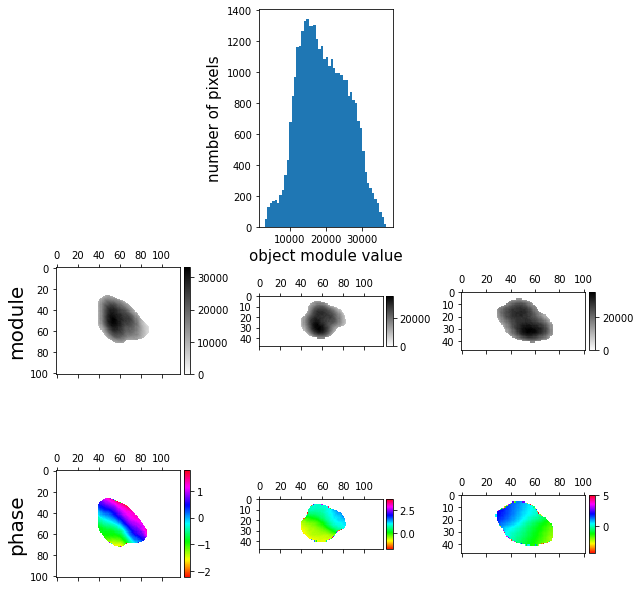

In [10]:
Nb_reconstruction = 20
params["show_cdi"] = 2000
make_several_reconstructions(data, params, file_dict, Nb_reconstruction)